In [2]:
import pandas as pd
import numpy as np
from scipy import stats, interpolate
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from ipywidgets import interact

# get a list of all the colour strings in matplotlib so we can iterate through them
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colour_list = list(colors.keys())
# 9 base colours ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'aliceblue', 'antiquewhite', 'aqua'...

In [77]:
class EvaluationData:

    def __init__(self, folder_path):
        self.file_names = ['curr_player', 'curr_adv', 'chal_player', 'chal_adv']
        self.eval_data = {}
        for name in self.file_names:
            file_path = os.path.join(folder_path, name + '.csv')
            data = pd.read_csv(file_path, usecols=['score_mean', 'score_var', 'len_mean', 'len_var', 'improvement', 'elo'])
            self.eval_data[name] = data
            
        print(self.eval_data['curr_player'])
        
    def plot_lengths(self):
        
        names = [self.eval_data['curr_adv'], self.eval_data['chal_adv'] ] 
        for data in names:
            plt.plot(data.index, data['len_mean'])
            plt.fill_between(data.index, data['len_mean']+np.sqrt(data['len_var']), data['len_mean']-np.sqrt(data['len_var']), alpha=0.5)
        plt.show()
        
        
        
    def plot_scores(self):
        
        names = [self.eval_data['curr_adv'], self.eval_data['chal_adv'] ] 
        for data in names:
            plt.plot(data.index, data['score_mean'])
            plt.fill_between(data.index, data['score_mean']+np.sqrt(data['score_var']), data['score_mean']-np.sqrt(data['score_var']), alpha=0.5)
        plt.show()
        

In [78]:
# folder = os.path.join('..\Cartpole','Data', 'TrainingData\\')
folder = os.path.join('ArchivedData', '0AdversaryXE', 'TestData\\')
results = EvaluationData(folder)

   score_mean  score_var  len_mean      len_var  improvement          elo
0    0.870488   0.036154     199.1     8.988889            0  1000.000000
1    0.753776   0.086828     182.2   572.844444            0   824.929820
2    0.548365   0.195663     126.7  1717.344444            0   762.693867
3    0.906967   0.022408     202.2   134.400000            0  1066.726238
4    0.574275   0.208681     127.2  2277.733333            0   826.869563
5    0.624077   0.190669     139.6  2096.488889            0   989.643490
6    0.753431   0.137773     167.7  1836.233333            0   979.909584
7    0.711980   0.145626     161.7  2827.788889            0   921.578344


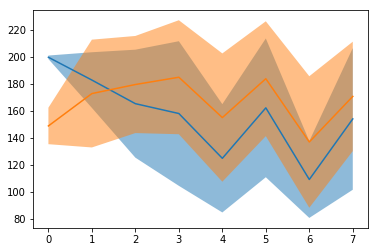

In [79]:
results.plot_lengths()

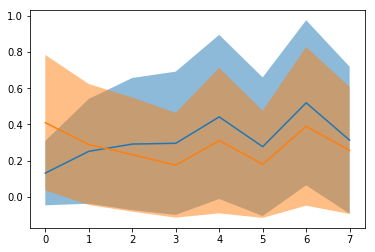

In [80]:
results.plot_scores()